In [200]:
import argparse
import math
import os
import time
import random


import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   

import numpy as np
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import torch.utils

In [3]:
output = torch.tensor([[ 0.2701, -0.6795, -0.0346,  1.0870,  0.8994, -0.1914],
        [ 1.7098, -0.6077, -0.3511, -1.9021, -0.6581, -0.0932],
        [-0.3657,  0.7989,  0.3230,  1.3830,  0.9267, -0.2006]])

In [4]:
output_emap = torch.tensor([[-0.2022, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338]])

In [27]:
output_emap.max(1)

torch.return_types.max(
values=tensor([-0.0804,  0.9980, -0.0822]),
indices=tensor([5, 5, 0]))

In [35]:
preds = output_emap.max(1, keepdim=True)[1]
preds = preds.view(len(preds),)

In [36]:
torch.bincount(preds)

tensor([1, 0, 0, 0, 0, 2])

In [45]:
preds = torch.tensor([[6],
        [9],
        [6],
        [8],
        [6],
        [6],
        [7],
        [0],
        [8],
        [2],
        [1],
        [5],
        [9],
        [5],
        [1],
        [3],
        [8],
        [6],
        [5],
        [6],
        [6],
        [1],
        [4],
        [5],
        [7],
        [8],
        [2],
        [4],
        [8],
        [3],
        [0],
        [7],
        [9],
        [7],
        [6],
        [0],
        [2],
        [8],
        [9],
        [1],
        [9],
        [7],
        [4],
        [8],
        [9],
        [8],
        [4],
        [6],
        [8],
        [5],
        [1],
        [7],
        [7],
        [8],
        [5],
        [7],
        [2],
        [3],
        [3],
        [6],
        [7],
        [7],
        [9],
        [3],
        [6],
        [1],
        [5],
        [6],
        [6],
        [4],
        [0],
        [0],
        [6],
        [8],
        [9],
        [7],
        [3],
        [4],
        [0],
        [4],
        [8],
        [8],
        [7],
        [0],
        [3],
        [5],
        [1],
        [4],
        [2],
        [4],
        [5],
        [0],
        [7],
        [9],
        [8],
        [9],
        [8],
        [4],
        [3],
        [5],
        [2],
        [4],
        [0],
        [9],
        [6],
        [1],
        [1],
        [1],
        [0],
        [0],
        [8],
        [6],
        [6],
        [5],
        [0],
        [3],
        [0],
        [4],
        [7],
        [1],
        [9],
        [3],
        [7],
        [5],
        [9],
        [2],
        [7],
        [7],
        [0],
        [0],
        [3],
        [5],
        [9],
        [2],
        [9],
        [4],
        [9],
        [2],
        [5],
        [8],
        [2],
        [1],
        [4],
        [1],
        [2],
        [4],
        [1],
        [1],
        [9],
        [1],
        [1],
        [1],
        [0],
        [4],
        [8],
        [2],
        [6],
        [3],
        [4],
        [2],
        [1],
        [7],
        [5],
        [3],
        [2],
        [9],
        [3],
        [0],
        [3],
        [0],
        [3],
        [0],
        [6],
        [8],
        [6],
        [7],
        [0],
        [5],
        [3],
        [3],
        [5],
        [0],
        [5],
        [9],
        [5],
        [7],
        [0],
        [8],
        [4],
        [6],
        [1],
        [6],
        [1],
        [8],
        [6],
        [0],
        [4],
        [3],
        [2],
        [8]])

In [46]:
preds.shape

torch.Size([200, 1])

In [47]:
preds = preds.view(preds.shape[0],)

In [48]:
preds.shape

torch.Size([200])

In [49]:
torch.bincount(preds)

tensor([23, 21, 15, 19, 19, 19, 23, 20, 22, 19])

In [51]:
torch.zeros(10) + torch.bincount(preds)

tensor([23., 21., 15., 19., 19., 19., 23., 20., 22., 19.])

# Norm

In [62]:
t = torch.ones(10)
torch.norm(t)

tensor(3.1623)

In [55]:
2**0.5

1.4142135623730951

In [88]:
output_emap = torch.tensor([[[-0.2022, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338],
        ],[
        [-0.900, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338]]])

In [89]:
output_emap.shape

torch.Size([2, 3, 6])

In [118]:
torch.norm(output_emap, dim=1)

tensor([0.3848, 1.0319, 0.2982])

In [ ]:
# output torch.Size([200, 10])
# output_exp_map torch.Size([200, 10])
# output1: torch.Size([200, 10])

In [100]:
for idx, i in enumerate(output_emap):
    print(i)
    print(torch.norm(output_emap[idx, :, :]))

tensor([[-0.2022, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338]])
tensor(1.1410)
tensor([[-0.9000, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338]])
tensor(1.4391)


In [94]:
torch.norm(output_emap, dim=-1, keepdim=True)

tensor([[[0.3848],
         [1.0319],
         [0.2982]],

        [[0.9577],
         [1.0319],
         [0.2982]]])

In [92]:
torch.norm(torch.tensor([-0.2022, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804]))

tensor(0.3848)

In [93]:
print(torch.norm(output_emap[0, :, :]), torch.norm(output_emap[1, :, :]))

tensor(1.1410) tensor(1.4391)


In [80]:
sum([220., 197., 192., 194., 211., 187., 193., 213., 209., 184.]) # 0.2 * 1000 = 200 samples per class. -> 10 classes == 2k 

2000.0

In [197]:
sum([177., 204., 147., 164., 213., 218., 218., 205., 171., 218., 225., 214.,
        203., 204., 279., 158., 198., 231., 194., 181., 201., 194., 231., 220.,
        150., 168., 216., 210., 215., 222., 220., 174., 216., 208., 217., 201.,
        208., 226., 146., 181., 160., 202., 223., 168., 203., 157., 202., 204.,
        161., 222., 207., 225., 205., 201., 192., 200., 166., 252., 164., 207.,
        237., 209., 144., 209., 175., 221., 164., 187., 193., 227., 196., 288.,
        190., 201., 182., 151., 204., 153., 163., 183., 225., 159., 251., 146.,
        228., 195., 226., 176., 156., 214., 217., 234., 197., 252., 196., 197.,
        257., 221., 186., 223.])

20000.0

In [198]:
sum([191., 193., 145., 168., 230., 210., 217., 224., 198., 211., 218., 194.,
        175., 219., 278., 156., 203., 232., 184., 184., 198., 185., 210., 189.,
        161., 152., 224., 206., 244., 178., 233., 158., 225., 264., 202., 208.,
        215., 187., 138., 175., 162., 192., 245., 184., 191., 160., 234., 158.,
        153., 192., 199., 229., 206., 213., 204., 218., 170., 236., 184., 207.,
        223., 232., 161., 196., 181., 215., 166., 187., 176., 219., 213., 271.,
        192., 212., 178., 160., 214., 164., 168., 200., 228., 148., 226., 176.,
        211., 212., 233., 179., 137., 221., 225., 250., 186., 236., 208., 169.,
        229., 248., 180., 251.])

20000.0

In [117]:
import torch
a = torch.arange(9, dtype= torch.float) - 4
print(a)
b = a.reshape((3, 3))
print(b)
print(torch.norm(a))
print(torch.norm(b))
print(torch.norm(a, float('inf')))
print(torch.norm(b, float('inf')))
c = torch.tensor([[ 1, 2, 3],[-1, 1, 4]] , dtype= torch.float)
print(c)
print('c', c.shape)
print(torch.norm(c, dim=0))
print(torch.norm(c, dim=1))
print(torch.norm(c, p=1, dim=1))
d = torch.arange(8, dtype= torch.float).reshape(2,2,2)
print(d)
print(torch.norm(d, dim=(1,2)))
print(torch.norm(d[0, :, :]), torch.norm(d[1, :, :]))

tensor([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])
tensor([[-4., -3., -2.],
        [-1.,  0.,  1.],
        [ 2.,  3.,  4.]])
tensor(7.7460)
tensor(7.7460)
tensor(4.)
tensor(4.)
tensor([[ 1.,  2.,  3.],
        [-1.,  1.,  4.]])
c torch.Size([2, 3])
tensor([1.4142, 2.2361, 5.0000])
tensor([3.7417, 4.2426])
tensor([6., 6.])
tensor([[[0., 1.],
         [2., 3.]],

        [[4., 5.],
         [6., 7.]]])
tensor([ 3.7417, 11.2250])
tensor(3.7417) tensor(11.2250)


# New Approach 

In [103]:
output_emap = torch.tensor([[-0.2022, -0.1647, -0.0952, -0.1733, -0.1857, -0.0804],
        [-0.0667, -0.1285, -0.1081, -0.1503, -0.1165,  0.9980],
        [-0.0822, -0.1429, -0.1028, -0.1190, -0.1383, -0.1338]])

In [104]:
output_emap.shape

torch.Size([3, 6])

In [105]:
torch.norm(output_emap[:, :])

tensor(1.1410)

In [115]:
torch.norm(torch.tensor(np.repeat(0.95,200)))

tensor(13.4350, dtype=torch.float64)

In [116]:
torch.norm(torch.ones(200))

tensor(14.1421)

In [119]:
torch.norm(torch.ones(10))

tensor(3.1623)

# Plot

In [132]:
norms =  np.array([0.9855723977088928, 0.999900221824646, 0.9985833764076233, 0.9996581077575684, 0.9728213548660278, 0.9999991059303284, 0.9994686841964722, 0.999210774898529, 0.9999109506607056, 0.9996673464775085, 0.999792218208313, 1.0, 0.9988974928855896, 0.9748643040657043, 0.9999608993530273, 0.9807248115539551, 0.999253511428833, 0.7056873440742493, 0.8033928871154785, 0.9997993111610413, 0.9995583891868591, 0.999862015247345, 0.9946449995040894, 0.9997286796569824, 0.9984358549118042, 0.9999747276306152, 0.9999975562095642, 0.9963991641998291, 0.9515624642372131, 0.8942859768867493, 0.9999640583992004, 0.99969083070755, 0.9999951124191284, 0.9997259378433228, 0.9984371066093445, 0.9822813272476196, 0.9996603727340698, 0.7099061012268066, 0.9999467134475708, 0.9727702736854553, 0.9842906594276428, 0.996619701385498, 0.9994169473648071, 0.9978293180465698, 0.9990164041519165, 0.9969066381454468, 0.9999266266822815, 0.9999122023582458, 0.9757967591285706, 0.9481878280639648, 0.9887661337852478, 0.9993129968643188, 0.9999999403953552, 0.9999999403953552, 0.9999547600746155, 0.9978827834129333, 0.9999857544898987, 0.9801886081695557, 0.9438146352767944, 0.9999982118606567, 0.958487868309021, 0.9671642780303955, 0.927066445350647, 0.9999648332595825, 0.9676061868667603, 0.9841648936271667, 0.9998971223831177, 0.9735018610954285, 0.9998335838317871, 0.9794200658798218, 0.9997172355651855, 0.9988765716552734, 0.9857025146484375, 0.9942758679389954, 0.9997168779373169, 0.9999973177909851, 0.9928014278411865, 0.9992162585258484, 0.9877978563308716, 0.9996201992034912, 0.9816523194313049, 0.8395105004310608, 0.9960216879844666, 0.9968202114105225, 0.9949406981468201, 0.999334990978241, 0.999987006187439, 0.9998087286949158, 0.999641478061676, 0.9984066486358643, 0.9999626874923706, 0.8313807249069214, 0.99992835521698, 0.9772144556045532, 0.9999726414680481, 0.9371472597122192, 0.9999985098838806, 0.9946146607398987, 0.8597268462181091, 0.8422176837921143, 0.973046064376831, 0.9997745752334595, 0.9597022533416748, 0.9999951124191284, 0.9953943490982056, 0.7872270941734314, 0.9999821186065674, 0.9943390488624573, 0.850470244884491, 0.8398047089576721, 0.9885158538818359, 0.9987972378730774, 0.9819644689559937, 0.9906001091003418, 0.9425426721572876, 0.9991462826728821, 0.9909144639968872, 0.9527053236961365, 0.995510995388031, 0.9423472285270691, 0.9670706391334534, 0.9997662305831909, 0.9795630574226379, 0.9963385462760925, 0.9999911785125732, 0.9544314742088318, 0.957892656326294, 0.9995137453079224, 0.996291995048523, 0.9903837442398071, 0.9953711032867432, 0.8001028299331665, 0.9999895095825195, 0.9990819096565247, 0.9999863505363464, 0.989371120929718, 0.9895753860473633, 0.8478362560272217, 0.983991265296936, 0.9925467371940613, 0.9982240796089172, 0.9942550659179688, 0.9731847643852234, 0.9962190985679626, 0.9785922169685364, 0.9990899562835693, 0.9999889731407166, 0.8096974492073059, 0.99577397108078, 0.9999136328697205, 0.985142707824707, 0.9177535176277161, 0.7848835587501526, 0.9999668002128601, 0.9977792501449585, 0.9881601333618164, 0.9894357919692993, 0.9996595978736877, 0.9728008508682251, 0.992418646812439, 0.9516496658325195, 0.9963579177856445, 0.9961594939231873, 0.9969098567962646, 0.9872617125511169, 0.9976400136947632, 0.9991343021392822, 0.9997416734695435, 0.9977744221687317, 0.9901361465454102, 0.9940961599349976, 0.9999819397926331, 0.9990429282188416, 0.9959651231765747, 0.9922568798065186, 0.995048999786377, 0.9693259000778198, 0.9839468598365784, 0.9999890327453613, 0.9999682307243347, 0.9976801872253418, 0.9999996423721313, 0.9912565350532532, 0.9308009743690491, 0.9994062185287476, 0.9991101622581482, 0.9999527335166931, 0.9999966621398926, 0.9724540710449219, 0.9996864199638367, 0.9890427589416504, 0.9999927282333374, 0.9818151593208313, 0.9891302585601807, 0.9995574355125427, 0.9954986572265625, 0.9999749660491943, 0.9998070001602173, 0.9976330995559692, 0.9998512268066406, 0.9999750256538391, 0.9941123127937317, 0.9396072626113892, 0.991252064704895, 0.9999968409538269, 0.9997678399085999, 0.9996663331985474, 0.9999049305915833, 0.9997252225875854, 0.9999958872795105, 0.7459661960601807, 0.9996616244316101, 0.9968892931938171, 0.9996625781059265, 0.9809887409210205, 0.9990500211715698, 0.9997575879096985, 0.9896854758262634, 0.9745259881019592, 0.9901899695396423, 0.9999995231628418, 0.965769350528717, 0.9995028972625732, 0.9179786443710327, 0.994218647480011, 0.9992830753326416, 0.9999112486839294, 0.9999442100524902, 0.9887176156044006, 0.9882832765579224, 0.9999850392341614, 0.9736462831497192, 0.9996200799942017, 0.9976474642753601, 0.9996533989906311, 0.9757687449455261, 0.9997264742851257, 0.9973948001861572, 0.9983912706375122, 0.9619331955909729, 0.9999873042106628, 0.9999204874038696, 0.9980779886245728, 0.9955466389656067, 0.8104334473609924, 0.9813283085823059, 0.996651291847229, 0.9985324740409851, 0.9674144387245178, 0.9990410208702087, 0.9940619468688965, 0.9624292850494385, 0.9998540282249451, 0.999997079372406, 0.9978530406951904, 0.9994345903396606, 0.9989515542984009, 0.9999961853027344, 0.9961615204811096, 0.9928346872329712, 0.9958498477935791, 0.9974464178085327, 0.9999511241912842, 0.9999015927314758, 0.9932308197021484, 0.9628435373306274, 0.9994792342185974, 0.9999066591262817, 0.976277768611908, 0.8805839419364929, 0.9998692870140076, 0.9999873638153076, 0.8680415749549866, 0.9949355125427246, 0.9969497323036194, 0.9740171432495117, 0.9905906915664673, 0.9840692281723022, 0.9999811053276062, 0.8388125896453857, 0.9934976100921631, 0.7969797253608704, 0.9453850388526917, 0.9928827285766602, 0.9970476627349854, 0.9960069060325623, 0.8974969387054443, 0.6329892873764038, 0.9995778203010559, 0.9941245913505554, 0.9994414448738098, 0.9999564290046692, 0.9999831318855286, 0.9665497541427612, 0.7510623931884766, 0.9950841069221497, 0.9090715050697327, 0.999925434589386, 0.9728854298591614, 0.9990571737289429, 0.9992649555206299, 0.9977966547012329, 0.9999905228614807, 0.9999975562095642, 0.9648208022117615, 0.9997992515563965, 0.9965195655822754, 0.992888867855072, 0.9965974688529968, 0.9991830587387085, 0.9309182167053223, 0.9998021125793457, 0.9981213808059692, 0.9990224242210388, 0.9535699486732483, 0.9799306988716125, 0.9999819993972778, 0.997993528842926, 0.8883097767829895, 0.9976473450660706, 0.9999985694885254, 0.9996596574783325, 0.9999774694442749, 0.7317658066749573, 0.9716781377792358, 0.9912893772125244, 0.9999970197677612, 0.980808436870575, 0.9859420657157898, 0.9969305992126465, 0.9941105842590332, 0.9999916553497314, 0.9826892018318176, 0.8673769235610962, 0.9999866485595703, 0.8080251812934875, 0.9944347739219666, 0.9389542937278748, 0.9999465942382812, 0.9989630579948425, 0.9994767904281616, 0.9972032308578491, 0.9999793767929077, 0.9804540276527405, 0.9997192621231079, 0.9990974068641663, 0.9999874234199524, 0.9997576475143433, 0.999942421913147, 0.9995685815811157, 0.9782559871673584, 0.9993891716003418, 0.9999127388000488, 0.9860320091247559, 0.9923477172851562, 0.9999697804450989, 0.9998788237571716, 0.9736872315406799, 0.9801367521286011, 0.9903352856636047, 0.9978398084640503, 0.9996429681777954, 0.9391274452209473, 0.9999945759773254, 0.9969449639320374, 0.9985576868057251, 0.999991774559021, 0.994469165802002, 0.9975103139877319, 0.9999837875366211, 0.995827317237854, 0.9999932646751404, 0.9999918341636658, 0.9993953704833984, 0.9986878037452698, 0.9999999403953552, 0.9988072514533997, 0.9976253509521484, 0.9992725849151611, 0.9980114698410034, 0.9986334443092346, 0.9757494926452637, 0.9913257956504822, 0.9998493790626526, 0.8687238693237305, 0.9989194273948669, 0.9994997382164001, 0.9999669790267944, 0.995177149772644, 0.9999191761016846, 0.9651198983192444, 0.9995694756507874, 0.9977833032608032, 0.9983322024345398, 0.9794456958770752, 0.9934058785438538, 0.9995521306991577, 0.991113007068634, 0.9772149324417114, 0.9402802586555481, 0.9986295104026794, 0.9960171580314636, 0.9293933510780334, 0.9999995231628418, 0.993306040763855, 0.999966025352478, 0.9968331456184387, 0.9751085042953491, 0.7456132769584656, 0.9607893228530884, 0.9956978559494019, 0.9999991059303284, 0.9999551177024841, 0.9985941052436829, 0.9841454029083252, 0.9514347910881042, 0.998376727104187, 0.9509770274162292, 0.9903666377067566, 0.9999173879623413, 0.9424220323562622, 0.9999858736991882, 0.9999933242797852, 0.9923339486122131, 0.9624267220497131, 0.9937403202056885, 0.989128828048706, 0.9172999858856201, 0.9940730929374695, 0.9998536705970764, 0.9995479583740234, 0.9969348311424255, 1.0, 0.9929669499397278, 0.9981166124343872, 0.9994058609008789, 0.9988481402397156, 0.9559667706489563, 0.9986105561256409, 0.9999799728393555, 0.9999778270721436, 0.9926427006721497, 0.9999614953994751, 0.8717771172523499, 0.9778001308441162, 0.9994879364967346, 0.9992474317550659, 0.9999754428863525, 0.9994785785675049, 0.9818120002746582, 0.9999426007270813, 0.9447129368782043, 0.9986222386360168, 0.9401745200157166, 0.9896343946456909, 0.9998337626457214, 0.9998758435249329, 0.999681830406189, 0.9291133284568787, 0.9980118870735168, 0.9908772706985474, 0.9992560148239136, 0.9462842345237732, 0.9688717126846313, 0.999987781047821, 0.9999675750732422, 0.9807531237602234, 0.9998749494552612, 0.9999839067459106, 0.9999821782112122, 0.9891881346702576, 0.9284788370132446, 0.9908270239830017, 0.9996510744094849, 0.9556612968444824, 0.9988356828689575, 0.8986859917640686, 0.9588111042976379, 0.9957298636436462, 0.8921729326248169, 0.9129127264022827, 0.9987318515777588, 0.9480326175689697, 0.998788058757782, 0.9982430934906006, 0.9685686230659485, 0.9984971880912781, 0.9918020963668823, 0.9351035356521606, 0.8513861894607544, 0.9996134042739868, 0.9972205758094788, 0.8925967812538147, 0.9930758476257324, 0.9876560568809509, 0.9997299313545227, 0.9908851385116577, 0.9964296221733093, 0.9996244311332703, 0.9999998807907104, 0.999879002571106, 0.9961963295936584,
 0.9999830722808838, 0.999925434589386, 0.9062355756759644, 0.9927821755409241, 0.9921571612358093, 0.8836464285850525, 0.9994886517524719, 0.9997941851615906, 0.8905550837516785, 0.9978681802749634, 0.9992743730545044, 0.9971017241477966, 0.9982039928436279, 0.9869275689125061, 0.7651965618133545, 0.9331550002098083, 0.9996128082275391, 0.9999915957450867, 0.9998897910118103, 0.9975746870040894, 0.9667520523071289, 0.9999978542327881, 0.9996981620788574, 0.8605305552482605, 0.981174647808075, 0.9999670386314392, 0.9999932050704956, 0.9851294159889221, 0.9257036447525024, 0.999841034412384, 0.9976706504821777, 0.9999998807907104, 0.9998400211334229, 0.8434885740280151, 0.9987572431564331, 0.7100255489349365, 0.9975135922431946, 0.9999902844429016, 0.99989914894104, 0.9970086216926575, 0.9358705282211304, 0.9976603388786316, 0.9976378083229065, 0.9999756217002869, 0.999442994594574, 0.9954394698143005, 0.9977964758872986, 0.9993451833724976, 0.9970078468322754, 0.9991583228111267, 0.9986024498939514, 0.9754617214202881, 0.9883295297622681, 0.9635495543479919, 0.9999853372573853, 0.9999979734420776, 0.8788353800773621, 0.9995136260986328, 0.9999843835830688, 0.9998929500579834, 0.9999998211860657, 0.9994457364082336, 0.9997854232788086, 0.9926134943962097, 0.9999750852584839, 0.9752172827720642, 0.940138041973114, 0.9826820492744446, 0.9078523516654968, 0.9998664259910583, 0.9999157786369324, 0.9355494976043701, 0.9995949864387512, 0.7589904069900513, 0.9999977350234985, 0.9985823631286621, 0.9998046159744263, 0.9998404383659363, 0.9999731183052063, 0.9995309710502625, 0.9999726414680481, 0.9972360730171204, 0.9862464070320129, 0.9999905824661255, 0.9810167551040649, 0.9999389052391052, 0.9998745918273926, 0.9645704627037048, 0.9698227047920227, 0.9808511137962341, 0.9992532134056091, 0.999971866607666, 0.9054310917854309, 1.0, 0.9999995827674866, 0.8777691125869751, 0.9999940991401672, 0.999953031539917, 0.9965027570724487, 0.9999829530715942, 0.9999390840530396, 0.9983401894569397, 0.9999913573265076, 0.6420376300811768, 0.9991960525512695, 0.9999988079071045, 0.8353475332260132, 0.8060773015022278, 0.99968022108078, 0.9999711513519287, 0.9906981587409973, 0.9992178678512573, 0.99920254945755, 0.9999911785125732, 0.9930892586708069, 0.998927652835846, 0.9994365572929382, 0.9999083876609802, 0.9999986886978149, 0.9935396909713745, 0.9999216794967651, 0.9995078444480896, 0.9313207268714905, 0.9998979568481445, 0.9786887764930725, 0.9980581402778625, 0.9999991655349731, 0.9920873641967773, 0.999778687953949, 0.9950752258300781, 0.9912071228027344, 0.9999590516090393, 0.9998608231544495, 0.9939128756523132, 0.9986926913261414, 0.9953873157501221, 0.9737886786460876, 0.9997615218162537, 0.9999849796295166, 0.9904329776763916, 0.9993510842323303, 0.9046200513839722, 0.9998040199279785, 0.9889113903045654, 0.9920206069946289, 0.9994624257087708, 0.9997326135635376, 0.9993258714675903, 0.9953151941299438, 0.9988341331481934, 0.9999891519546509, 0.9930720925331116, 0.9961638450622559, 0.99713534116745, 0.9945321083068848, 0.9811174869537354, 0.894196629524231, 0.9994348287582397, 0.9986293315887451, 0.9995389580726624, 0.995812177658081, 0.940601110458374, 0.9999829530715942, 0.9609144926071167, 0.9999591112136841, 0.9999892115592957, 0.9309436678886414, 0.9999969601631165, 0.9985540509223938, 0.9610126614570618, 0.9999874234199524, 0.9954733848571777, 0.9327185153961182, 0.9952141046524048, 0.9994998574256897, 0.9940358996391296, 0.9913249015808105, 0.9975528120994568, 0.9974287152290344, 0.9980405569076538, 0.9999562501907349, 0.9999983906745911, 0.9992435574531555, 0.9981645345687866, 0.9934148788452148, 0.9999323487281799, 0.9998282790184021, 0.9873400926589966, 0.7557384967803955, 0.9989871382713318, 0.9889788627624512, 0.9999936819076538, 0.9995667338371277, 0.9659450650215149, 0.9922267198562622, 0.9398854970932007, 0.9966514706611633, 0.9988446235656738, 0.9962157011032104, 0.965151309967041, 0.9999426007270813, 0.975651204586029, 0.9955637454986572, 0.9358683824539185, 0.9986002445220947, 0.9504138231277466, 0.9996156692504883, 0.9950578212738037, 0.914969801902771, 0.9918884038925171, 0.9342662692070007, 0.9989485144615173, 0.9991652965545654, 0.97349613904953, 0.9882528781890869, 0.9998556971549988, 0.9823070764541626, 0.9999975562095642, 0.9896060824394226, 0.9979860782623291, 0.9890449047088623, 0.9944589734077454, 0.9990732073783875, 0.9999896287918091, 0.9999886751174927, 0.9954937100410461, 0.8512817621231079, 0.9997272491455078, 0.9941068291664124, 0.9920741319656372, 0.9997866749763489, 0.99884033203125, 0.9975159764289856, 0.9985878467559814, 0.9997045397758484, 0.9227336049079895, 0.9954560995101929, 0.9999998211860657, 0.9999992251396179, 0.9999920725822449, 0.961844801902771, 0.9998050928115845, 0.9899115562438965, 0.9987195134162903, 0.9960218071937561, 0.9878337383270264, 0.9999964833259583, 0.9923120737075806, 0.7881377339363098, 0.9776728749275208, 0.9675818681716919, 0.9992749094963074, 0.9872660040855408, 0.9889630079269409, 0.9334773421287537, 0.9787047505378723, 0.9995612502098083, 0.9734864234924316, 0.9216814041137695, 0.9783333539962769, 0.962562620639801, 0.9996805787086487, 0.9998371005058289, 0.9941081404685974, 0.9998763799667358, 0.9303127527236938, 0.9905791878700256, 0.9946118593215942, 0.9999822974205017, 0.9997462630271912, 0.989535927772522, 0.9999991059303284, 0.9999804496765137, 0.9991937279701233, 0.9620943069458008, 0.9986079931259155, 0.9622907042503357, 0.9995262026786804, 0.9993777275085449, 0.9809001088142395, 0.9973105788230896, 0.7939515709877014, 0.9999992847442627, 0.9840841293334961, 0.8559334874153137, 0.9993306398391724, 0.9997580051422119, 0.9999894499778748, 0.9932485818862915, 0.9935012459754944, 0.9999999403953552, 0.8769254684448242, 0.9999039769172668, 0.9996694922447205, 0.999830961227417, 0.9985100626945496, 0.99832683801651, 0.9979231953620911, 0.9691352844238281, 0.997975766658783, 0.9792596101760864, 0.999894917011261, 0.9999493360519409, 0.969049870967865, 0.9955859184265137, 0.9999196529388428, 0.9999822974205017, 0.9976405501365662, 0.9950032830238342, 0.997223973274231, 0.9991211295127869, 0.9998117685317993, 0.9765514731407166, 0.9970720410346985, 0.9983383417129517, 0.9917370080947876, 0.9677934646606445, 0.9602983593940735, 0.9999880790710449, 0.9991655349731445, 0.9016439318656921, 0.9298611879348755, 0.9998089075088501, 0.8694025278091431, 0.9985325336456299, 0.8768098950386047, 0.9680227637290955, 0.9999991059303284, 0.9998963475227356, 0.9995171427726746, 0.9992037415504456, 0.9984744787216187, 0.9753146767616272, 0.9999966025352478, 0.9986832141876221, 0.9464666843414307, 0.9975997805595398, 0.9999955892562866, 0.9999996423721313, 0.9999927282333374, 0.5156557559967041, 0.9999847412109375, 0.9966776371002197, 0.999878466129303, 0.9427633285522461, 0.999459981918335, 0.9994556903839111, 0.9941150546073914, 0.9980517625808716, 0.9996242523193359, 0.9981299042701721, 0.9999961256980896, 0.9996494650840759, 0.9994743466377258, 0.9873261451721191, 0.9922283291816711, 0.996694028377533, 0.996675968170166, 0.9996544718742371, 0.9991993308067322, 0.9961608648300171, 0.99801105260849, 0.9965320229530334, 0.9874369502067566, 0.9875158071517944, 0.9817128777503967, 0.9976009726524353, 0.9999992847442627, 0.9885584115982056, 0.9888225793838501, 0.9997158646583557, 0.9988049268722534, 0.9995281100273132, 0.8971595168113708, 0.9572995901107788, 0.9998073577880859, 0.999822199344635, 0.9999871850013733, 0.9538565874099731, 0.9997093081474304, 0.9591686129570007, 0.9862747192382812, 0.9989866614341736, 0.9782940745353699, 0.9998300075531006, 0.9992132782936096, 0.7444455623626709, 0.967785120010376, 0.9996644854545593, 0.9963720440864563, 0.9912579655647278, 0.9941582083702087, 0.9953569173812866, 0.9996281266212463, 0.9954078793525696, 0.9979831576347351, 0.9862241744995117, 0.9960973262786865, 0.8747338652610779, 0.8872225880622864, 0.9999883770942688, 0.9967185854911804, 0.9893054962158203, 0.9999991655349731, 0.9999851584434509, 0.9998251795768738, 0.9949277639389038, 0.9958628416061401, 0.999983549118042, 0.978266179561615, 0.9999153017997742, 0.9999693036079407, 0.9999925494194031, 0.9650717377662659, 0.9985063076019287, 0.9999731183052063, 0.999953031539917, 0.991619348526001, 0.9984013438224792, 0.9999470114707947, 0.9747587442398071, 0.997489869594574, 0.9973007440567017, 0.9974948167800903, 0.9999522566795349, 0.9814133048057556, 0.9145327210426331, 0.9968296885490417, 0.9971029758453369, 0.9858642220497131, 0.9988866448402405, 0.9914753437042236, 0.9946333765983582, 0.8982341289520264, 0.9994654655456543, 0.9996775984764099, 0.9999243021011353, 0.999910295009613, 0.9981982707977295, 0.9997292757034302, 0.999659538269043, 0.8731666207313538, 0.9791840314865112, 0.9921839833259583, 0.9999363422393799, 0.9989553689956665, 0.9869347214698792, 0.9935020804405212, 0.9931433200836182, 0.9912949204444885, 0.9999979734420776, 0.977150559425354, 0.9946704506874084, 0.9991205334663391, 0.9961585402488708, 1.0, 0.9998906850814819, 0.998455286026001, 0.9995704293251038, 0.9989705681800842, 0.9712529182434082, 0.9985266923904419, 0.9673436284065247, 0.9981256127357483, 0.9996475577354431, 0.9995084404945374, 0.9992749094963074, 0.9996528625488281, 0.8768937587738037, 0.9993082284927368, 0.9992145299911499, 0.9999927878379822, 0.964252233505249, 0.9641289710998535, 0.9999411702156067, 0.9946849942207336, 0.9995915293693542, 0.9957917332649231, 0.9999473094940186, 0.9887385368347168, 0.9926797151565552, 0.9999914169311523, 0.8282042145729065, 0.9645267128944397, 0.9916836023330688, 0.9642940163612366, 0.9998692870140076, 0.997563898563385, 0.9928572177886963, 0.9989991784095764, 0.9995558857917786, 0.951938271522522, 0.9981503486633301, 0.9998220801353455, 0.9998341798782349, 0.9979373216629028, 0.9990057945251465, 0.9998551607131958, 0.9999921321868896, 0.9995153546333313, 0.9940842986106873, 0.998870849609375, 0.9974223971366882, 0.9992659091949463,
  0.9992979168891907, 0.7343735098838806, 0.9999940991401672, 0.9785864353179932, 0.8585216999053955, 0.999618649482727, 0.9100202918052673, 0.9999758005142212, 0.9996572732925415, 0.9914533495903015, 0.9809340834617615, 0.9942034482955933, 0.9962669014930725, 1.0, 0.9939950704574585, 0.9392765760421753, 0.9982042908668518, 0.9989999532699585, 0.9954550266265869, 0.9927841424942017, 0.9953047037124634, 0.9957915544509888, 0.9981263279914856, 0.7426387071609497, 0.7089197039604187, 0.997294008731842, 0.9999813437461853, 0.9996766448020935, 0.9963761568069458, 0.9987916946411133, 0.9986616969108582, 0.9999681711196899, 0.9998747110366821, 0.9949328899383545, 0.8870344758033752, 0.9433014392852783, 0.9302959442138672, 0.9981712698936462, 0.9999157786369324, 0.9994235038757324, 0.9988592863082886, 0.9998452663421631, 0.9974159002304077, 0.9961400032043457, 0.9610142707824707, 0.970350444316864, 0.9643946290016174, 0.9687931537628174, 0.9994224905967712, 0.9964097142219543, 0.992205798625946, 0.999885618686676, 0.9880521297454834, 0.9867311120033264, 0.9746866822242737, 0.880845844745636, 0.9998277425765991, 0.997361421585083, 0.9988077282905579, 0.9995513558387756, 0.9994325041770935, 0.9543644189834595, 0.9993098378181458, 0.9989436268806458, 0.9995765089988708, 0.9991428256034851, 0.9996979832649231, 0.9990327954292297, 0.9812474846839905, 0.9999496340751648, 0.9999591708183289, 0.9821144342422485, 0.9864767789840698, 0.999338686466217, 0.9179984331130981, 0.9977036118507385, 0.9974137544631958, 0.9998428821563721, 0.9967944622039795, 0.9999389052391052, 0.9999738931655884, 0.9998902082443237, 0.9685825109481812, 0.9977352619171143, 0.9999231696128845, 0.9887121915817261, 0.9973540306091309, 0.9433665871620178, 0.999524712562561, 0.9994261860847473, 0.9998234510421753, 0.9909090995788574, 0.9999513030052185, 0.9995343685150146, 0.9172539114952087, 0.9989927411079407, 0.9805791974067688, 0.9998613595962524, 0.9488317966461182, 0.959041178226471, 0.9972351789474487, 0.9999921917915344, 0.9998916983604431, 0.9688467383384705, 0.9998117089271545, 0.9991253018379211, 0.9721719026565552, 0.9999983906745911, 0.9933590292930603, 0.9982550144195557, 0.9996587634086609, 0.9999245405197144, 0.9999606013298035, 0.9975154995918274, 0.9895417094230652, 0.9990190267562866, 0.9997038245201111, 0.9994316697120667, 0.9997439384460449, 0.9986932873725891, 0.9987217783927917, 0.9705168008804321, 0.9999034404754639, 0.9999762773513794, 0.9691200852394104, 0.9997937679290771, 0.9999971389770508, 0.987921953201294, 0.9999934434890747, 0.9287477135658264, 0.9898860454559326, 0.9995487928390503, 0.9994242787361145, 0.8750240206718445, 0.8772146701812744, 0.8463334441184998, 0.9998390078544617, 0.9679584503173828, 0.982691764831543, 0.9984567165374756, 0.999991238117218, 0.8913741111755371, 0.9864183664321899, 0.998464047908783, 0.9912829995155334, 0.9502967596054077, 0.9997674226760864, 0.9865165948867798, 0.9058900475502014, 0.990397036075592, 0.9943608045578003, 0.9997727274894714, 0.9941688179969788, 0.9651467800140381, 0.9993702173233032, 0.9862450957298279, 0.8535905480384827, 0.8466991782188416, 0.9912573099136353, 0.9990000128746033, 0.9939481019973755, 0.9874005913734436, 0.9990797638893127, 0.9271234273910522, 0.9996784925460815, 0.997111976146698, 0.9999645948410034, 0.9978623986244202, 0.9989442825317383, 0.9990331530570984, 0.996272087097168, 0.997189998626709, 0.9990897178649902, 0.9179268479347229, 0.817109227180481, 0.999982476234436, 0.9997537136077881, 0.9988044500350952, 0.9981352686882019, 0.9456918835639954, 0.9996915459632874, 0.9982085227966309, 0.9999801516532898, 0.9992886781692505, 0.9997156262397766, 0.9050813317298889, 0.9834290146827698, 0.9938875436782837, 0.9560714960098267, 0.9979996681213379, 0.9960592985153198, 0.9998519420623779, 0.9132089018821716, 0.9172976016998291, 0.9963314533233643, 0.9789561629295349, 0.996796190738678, 0.982368528842926, 0.9999982118606567, 0.9757877588272095, 0.9878000020980835, 0.9899157285690308, 0.9999853372573853, 0.9985663294792175, 0.995164155960083, 0.9975041747093201, 0.9986987113952637, 0.5251935720443726, 0.7198269963264465, 0.9985648989677429, 0.9703095555305481, 0.9447942972183228, 0.9999352693557739, 0.9999833106994629, 0.9999244213104248, 0.9996985793113708, 0.9953660368919373, 0.998110294342041, 0.9994975924491882, 0.9810241460800171, 0.914554238319397, 0.9997402429580688, 0.8306071758270264, 0.994386613368988, 0.9999692440032959, 0.9983975291252136, 0.9967712163925171, 0.9998738169670105, 0.9997746348381042, 0.9999053478240967, 0.9999977946281433, 0.9994622468948364, 0.9985843300819397, 0.9692118763923645, 0.9997122883796692, 0.9934064149856567, 0.9772710800170898, 0.9980282187461853, 0.9957540035247803, 0.599007248878479, 0.9673447608947754, 0.9994520545005798, 0.9259654879570007, 0.9727153182029724, 0.9990997910499573, 0.9655587673187256, 0.9823368787765503, 0.9043000340461731, 0.9914548397064209, 0.996849536895752, 0.9999999403953552, 0.9998578429222107, 0.9998068809509277, 0.9992678761482239, 0.9745826125144958, 0.9999868273735046, 0.9998701214790344, 0.9955422282218933, 0.7494608759880066, 0.7291181683540344, 0.9174327254295349, 0.9999933838844299, 0.9816552400588989, 0.9994326829910278, 0.9990430474281311, 0.9994069933891296, 0.9997081160545349, 0.9527157545089722, 0.9219426512718201, 0.9298264384269714, 0.9704075455665588, 0.9992682337760925, 0.898198664188385, 0.9886448383331299, 0.9993664026260376, 0.9278634786605835, 0.9951233863830566, 0.9998983144760132, 0.9999599456787109, 0.998282253742218, 0.9433028697967529, 0.9997178912162781, 0.9603307247161865, 0.9418213963508606, 0.9287563562393188, 0.9673962593078613, 0.9832094311714172, 0.9996978044509888, 0.9977992177009583, 0.9718809127807617, 0.9947091341018677, 0.9989939332008362, 0.9998892545700073, 0.9935912489891052, 0.9999827742576599, 0.972815752029419, 0.9853519201278687, 0.9402466416358948, 0.9999352693557739, 0.9995489716529846, 0.9997503757476807, 0.9987610578536987, 0.9999966025352478, 0.9480459094047546, 0.9931395053863525, 0.9998762607574463, 0.9999996423721313, 0.9994738698005676, 0.942534863948822, 0.9999999403953552, 0.9562458992004395, 0.96324223279953, 0.9993367791175842, 0.9977079033851624, 0.9996686577796936, 0.5813632011413574, 0.5811471343040466, 0.9931108355522156, 0.9999741315841675, 0.9958182573318481, 0.9986057281494141, 0.9998219013214111, 0.9510634541511536, 0.9997055530548096, 0.9985561966896057, 0.998834490776062, 0.9703043103218079, 0.9952989816665649, 0.8821368217468262, 0.9831575155258179, 0.9998507499694824, 0.9743591547012329, 0.830014169216156, 0.9984390139579773, 0.9975380301475525, 0.9931578040122986, 0.4735204577445984, 0.9905697703361511, 0.9999909996986389, 0.9793263673782349, 0.9998729228973389, 0.9981487989425659, 0.9566617608070374, 0.7676476240158081, 0.9820649027824402, 0.994282603263855, 0.9999669790267944, 0.5208167433738708, 0.9957339763641357, 0.9940614104270935, 0.9300031661987305, 0.9957337975502014, 0.9996208548545837, 0.9986349940299988, 0.9999356269836426, 0.999467134475708, 0.9928481578826904, 0.9767557382583618, 0.9998522400856018, 0.9987994432449341, 0.9942222833633423, 0.9883371591567993, 0.9986198544502258, 0.9947931170463562, 0.9987018704414368, 0.9993515610694885, 0.9618589282035828, 0.9997959136962891, 0.9997186064720154, 0.9999656677246094, 0.9905307292938232, 0.9999454617500305, 0.9999226331710815, 0.9999006390571594, 0.9959105849266052, 0.999973714351654, 0.7852356433868408, 0.9999193549156189, 0.7660508155822754, 0.9920928478240967, 0.9999025464057922, 0.9991035461425781, 0.9999844431877136, 0.9986061453819275, 0.9999852776527405, 0.999527633190155, 0.9999209046363831, 0.997178316116333, 0.9954643845558167, 0.9902265071868896, 0.9986979961395264, 0.7378298044204712, 0.9998883008956909, 1.0, 0.9802224636077881, 0.9901060461997986, 0.9993876814842224, 0.6501058340072632, 0.9982043504714966, 0.9997619986534119, 0.9999215602874756, 0.9336846470832825, 0.9999970197677612, 0.9921060800552368, 0.9983076453208923, 0.9994900226593018, 0.922109067440033, 0.9767173528671265, 0.9995434284210205, 0.9999907612800598, 0.9999960064888, 0.9980509877204895, 0.9991079568862915, 0.9999260306358337, 0.9996830224990845, 0.9984627962112427, 0.9587593078613281, 0.9976593255996704, 0.9995847344398499, 0.9999440908432007, 0.9997838735580444, 0.9999123811721802, 0.9985519647598267, 0.9974998235702515, 0.9963454008102417, 0.999756395816803, 0.9945442080497742, 0.9949922561645508, 0.9940842390060425, 0.99991375207901, 0.9998806118965149, 0.9134764671325684, 0.9999997019767761, 0.9969329833984375, 0.9971075057983398, 0.99995356798172, 0.9986863136291504, 0.992179811000824, 0.999741792678833, 0.998650848865509, 0.9938507676124573, 0.9819486737251282, 0.9853547811508179, 0.9995437860488892, 0.9529950022697449, 0.9750891327857971, 0.9994138479232788, 0.972504734992981, 0.9923250675201416, 0.9856124520301819, 0.9839383363723755, 0.9699147939682007, 0.7656812071800232, 0.9999565482139587, 0.9965803623199463, 0.9999269843101501, 0.9999998211860657, 0.9939113259315491, 0.9882147312164307, 0.9949376583099365, 0.999353289604187, 0.7711231708526611, 0.7986642718315125, 0.987823486328125, 0.9953375458717346, 0.985984206199646, 0.9618801474571228, 0.9922773838043213, 0.9994451999664307, 0.9215081930160522, 0.9999747276306152, 0.9872841238975525, 0.9997101426124573, 0.9986254572868347, 0.9996682405471802, 0.8661261200904846, 0.9996101260185242, 0.9989539384841919, 0.9990853667259216, 0.9592680931091309, 0.9829855561256409, 0.9999954700469971, 0.9765922427177429, 0.9560141563415527, 0.9993517994880676, 0.8991414904594421, 0.9951688051223755, 0.9798275828361511, 0.9992074966430664, 0.9992889761924744, 0.9990742206573486, 0.9993996620178223, 0.957737386226654, 0.9997686743736267, 0.9999817609786987, 0.9980624318122864, 0.9995800256729126, 0.9997454881668091, 0.9970875978469849, 0.9967541098594666, 0.9977407455444336, 0.9999120831489563, 0.997294008731842, 0.993415117263794,
   0.9122731685638428, 0.9924597144126892, 0.9998840093612671, 0.995573103427887, 0.6603942513465881, 0.9972444772720337, 0.996666431427002, 0.9907992482185364, 0.9990575313568115, 0.9795656204223633, 0.7947756052017212, 0.9999575614929199, 0.935562789440155, 0.999678909778595, 0.9999985098838806, 0.9995476007461548, 0.998439610004425, 0.9856163859367371, 0.9999186992645264, 0.9882842302322388, 0.9925447106361389, 0.9851614236831665, 0.9749768376350403, 0.9991345405578613, 0.9907259345054626, 0.9998775124549866, 0.9489255547523499, 0.9938473105430603, 0.9861294627189636, 0.997916042804718, 0.7082468867301941, 0.9970718622207642, 0.9924306273460388, 0.9404564499855042, 0.9999134540557861, 0.9612234830856323, 0.9989825487136841, 0.9770470261573792, 0.9999982118606567, 0.9995628595352173, 0.9949048757553101, 0.7837108969688416, 0.9955855011940002, 0.9978249669075012, 0.9956011176109314, 0.998871922492981, 0.999963641166687, 0.9956881999969482, 0.9839650988578796, 0.8390411138534546, 0.9409826397895813, 0.9999714493751526, 0.9968002438545227, 0.9998269081115723, 0.9999477863311768, 0.9995665550231934, 0.9995257258415222, 0.9999790787696838, 0.94780033826828, 0.996726393699646, 0.9968294501304626, 0.9922586679458618, 0.995108425617218, 0.9976447820663452, 0.9999796152114868, 0.9985208511352539, 0.9754400849342346, 0.9992496967315674, 0.9967963099479675, 0.9810486435890198, 0.9988001585006714, 0.9923981428146362, 0.9954256415367126, 0.9975517988204956, 0.8874424695968628, 0.9906127452850342, 0.9916514158248901, 0.8090315461158752, 0.9995192289352417, 0.9964988231658936, 0.9892179369926453, 0.9899255633354187, 0.9999685883522034, 0.950994074344635, 0.9872748851776123, 0.9999818801879883, 0.9999748468399048, 0.9951418042182922, 0.8331717848777771, 0.9295880794525146, 0.9923179149627686, 0.9999480247497559, 0.9672295451164246, 0.9973788857460022, 0.9997539520263672, 0.9608750343322754, 0.9917195439338684, 0.9455950856208801, 0.9983144998550415, 0.9241644740104675, 0.9988210201263428, 0.9628480076789856, 0.9997550249099731, 0.9998641610145569, 0.9961614012718201, 0.9807178974151611, 0.9999721050262451, 0.9995284080505371, 0.9960904121398926, 0.9999921321868896, 0.9998795390129089, 0.98398756980896, 0.9968320727348328, 0.9816776514053345, 0.9983968138694763, 0.9999167919158936, 0.9982720017433167, 0.9975133538246155, 0.9990339279174805, 0.9999396800994873, 0.9999954700469971, 0.9999979734420776, 0.9994606971740723, 0.9587603807449341, 0.9831346273422241, 0.9821875095367432, 0.8167107105255127, 0.9987987875938416, 0.9752368927001953, 0.9063646793365479, 0.9999035000801086, 0.9900696277618408, 0.8945512175559998, 0.969355583190918, 0.9356649518013, 0.9995644092559814, 0.99867182970047, 0.9999657869338989, 0.9997930526733398, 0.998549222946167, 0.9997028708457947, 0.99920654296875, 0.9999994039535522, 0.9997410178184509, 0.9929977655410767, 0.9999986886978149, 0.990712583065033, 0.9998832941055298, 0.9969638586044312, 0.9999962449073792, 0.999564528465271, 0.996467649936676, 0.9999070763587952, 0.9999249577522278, 0.9642215371131897, 0.9989510178565979, 0.986883819103241, 0.886430561542511, 0.9955259561538696, 0.6679520606994629, 0.9661751985549927, 0.9999462366104126, 0.9954007863998413, 0.9999608993530273, 0.9999066591262817, 0.7546250224113464, 0.9999746680259705, 0.9997794032096863, 0.975820779800415, 0.9995719790458679, 0.9999366998672485, 0.9989895224571228, 0.9977891445159912, 0.9648839235305786, 0.9999754428863525, 0.9743288159370422, 0.9998050332069397, 0.9999197721481323, 0.999273955821991, 0.9806548357009888, 0.9998010396957397, 0.9996184706687927, 0.9829568862915039, 0.9967470169067383, 0.999995231628418, 0.9999328851699829, 0.997403621673584, 0.9998088479042053, 0.9996513724327087, 0.6954556703567505, 0.9999747276306152, 0.9992058277130127, 0.9552213549613953, 0.9979360103607178, 0.9969853758811951, 0.9936983585357666, 0.9958916306495667, 0.9999476075172424, 0.999389111995697, 0.9999825954437256, 0.6719139218330383, 0.9998685717582703, 0.9948368072509766, 0.9366349577903748, 0.9151262640953064, 0.9964749217033386, 0.9720922708511353, 0.9989261627197266, 0.9535106420516968, 0.9882229566574097, 0.9987544417381287, 0.9957267642021179, 0.9996902346611023, 0.9995911121368408, 0.9132357239723206, 0.9999326467514038, 0.9999145269393921, 0.9806298613548279, 0.9999938607215881, 0.9052978754043579, 0.9625603556632996, 0.999978244304657, 0.9877112507820129, 0.9972160458564758, 0.9949703216552734, 0.9905449748039246, 0.9326141476631165, 0.9965147376060486, 0.9999651908874512, 0.9854482412338257, 0.9994375705718994, 0.9998873472213745, 0.9930061101913452, 0.9999964237213135, 0.9412407279014587, 0.9999799132347107, 0.9977898001670837, 0.9800466895103455, 0.9970697164535522, 0.999999463558197, 0.9991143345832825, 0.9956004023551941, 0.9997959733009338, 0.9986145496368408, 0.9952154159545898, 0.9980445504188538, 0.9857780337333679, 0.9849289655685425, 0.9950903654098511, 0.9978318810462952, 0.9500912427902222, 0.8324747681617737, 0.9999345541000366, 0.9808684587478638, 0.9647986888885498, 0.9976561069488525, 0.9989738464355469, 0.9708295464515686, 0.9931286573410034, 0.9980640411376953, 0.9976522326469421, 0.9999903440475464, 0.9964640736579895, 0.9959895610809326, 0.9999517798423767, 0.9996718764305115, 0.997848391532898, 0.9944958686828613, 0.999648928642273, 0.9996947646141052, 0.9549019932746887, 0.5823212265968323, 0.998378336429596, 0.9999929666519165, 0.9532002806663513, 0.998857855796814, 0.9983673095703125, 0.9952532052993774, 0.9982573986053467, 0.9964572787284851, 0.9134904742240906, 0.9999814629554749, 0.9365332126617432, 0.9970091581344604, 0.6943387389183044, 0.9915425181388855, 0.9998522996902466, 0.9967929124832153, 0.9479555487632751, 0.9503150582313538, 0.9931219816207886, 0.9948686361312866, 0.9998013377189636, 0.9999827146530151, 0.9987311363220215, 0.9993221759796143, 0.9984440207481384, 0.8825157880783081, 0.9994924068450928, 0.9967666864395142, 0.9998965263366699, 0.8775663375854492, 0.9999672174453735, 0.996563196182251, 0.9998700022697449, 0.709004282951355, 0.9238853454589844, 0.9512839317321777, 0.99859619140625, 0.946108341217041, 0.9874974489212036, 0.9769758582115173, 0.9886499047279358, 0.9999600052833557, 0.9742103219032288, 0.9671537280082703, 0.9975993633270264, 0.9965234994888306, 0.9976354837417603, 0.9999851584434509, 0.9857264757156372, 0.9541435241699219, 0.9996712803840637, 0.9840565919876099, 0.9988800287246704, 0.9996823072433472, 0.9999982714653015, 0.9893795251846313, 0.9891488552093506, 0.9744435548782349, 0.7222223281860352, 0.998405933380127, 0.9889963269233704, 0.9999969601631165, 0.9999403953552246, 0.995282769203186, 0.9998403191566467, 0.9999732375144958, 0.9893719553947449, 0.998456597328186, 0.962978720664978, 0.9484252333641052, 0.9916173815727234, 0.93077152967453, 0.9999942779541016, 0.9987663626670837, 0.9954044818878174, 0.9987432956695557, 0.9994845390319824, 0.9937873482704163, 0.9841833710670471, 0.9940834045410156, 0.9998326897621155, 0.9054417014122009, 0.9214625358581543, 0.9991351366043091, 0.9337752461433411, 0.9981865286827087, 0.9994120001792908, 0.9318228363990784, 0.9771060347557068, 0.9991223812103271, 0.9989619851112366, 0.9999204277992249, 0.9962911009788513, 0.9999752640724182, 0.9989303946495056, 0.9879609942436218, 0.9059062600135803, 0.9737053513526917, 0.6930961608886719, 0.9998143911361694, 0.9999867081642151, 0.9972856640815735, 0.9999032020568848, 0.9999950528144836, 0.9976730942726135, 0.6860442161560059, 0.9997827410697937, 0.9832876324653625, 0.7207731604576111, 0.9487012028694153, 0.9999346137046814, 0.9284452199935913, 0.9971947073936462, 0.9999083876609802, 0.9987437129020691, 0.9819679260253906, 0.9977706074714661, 0.9993258714675903, 0.9450345635414124, 0.9680649638175964, 0.9999001026153564, 0.9838746786117554, 0.9330725073814392, 0.9968237280845642, 0.9999629259109497, 0.9569764137268066, 0.9997463226318359, 0.9921572804450989, 0.9874114990234375, 0.9946175813674927, 0.9999614953994751, 0.9946609139442444, 0.999113142490387, 0.9919975399971008, 0.9998300075531006, 0.9998175501823425, 0.9852917194366455, 0.9964160323143005, 0.9997496604919434, 0.9874287247657776, 0.9221097826957703, 0.9995652437210083, 0.9997705817222595, 0.9058157205581665, 0.944485604763031, 0.9497031569480896, 0.934765100479126, 0.9910785555839539, 0.9999418258666992, 0.8746530413627625, 0.9913148283958435, 0.9990826845169067, 0.9996246099472046, 0.9811834096908569, 0.9663583040237427, 0.994549036026001, 0.999999463558197, 0.9832128286361694, 0.9999940991401672, 0.9999629855155945, 0.9999862909317017, 0.9999899864196777, 0.999245822429657, 0.9980083107948303, 0.9997159838676453, 0.9998343586921692, 0.9840040802955627, 0.9205093383789062, 0.9950335025787354, 0.9051793813705444, 0.9967930316925049, 0.9900552034378052, 0.9999960660934448, 0.9999094009399414, 0.9995803236961365, 0.9964503645896912, 0.9950485229492188, 0.9997512102127075, 0.9995890259742737, 0.9999896287918091, 0.9880585074424744, 0.9917840361595154, 0.9842645525932312, 0.7800776362419128, 0.9984232783317566, 0.9930798411369324, 0.9972214102745056, 0.9050139784812927, 0.9946393370628357, 0.9976599812507629, 0.9636043906211853, 0.9986423850059509, 0.9920024275779724, 0.9857178926467896, 0.9999907612800598, 0.9997991323471069, 0.9906697273254395, 0.9855386018753052, 0.9999987483024597, 0.8375743627548218, 0.9388319849967957, 0.9999325275421143, 0.9999575614929199, 0.9996117353439331, 0.9998764395713806, 0.9999510645866394, 0.6357194781303406, 0.999993085861206, 0.9999670386314392, 0.9999561309814453, 0.9993829727172852, 0.8941055536270142, 0.9994665384292603, 0.9993177056312561, 0.9992913603782654, 0.9999675154685974, 0.9986119270324707, 0.9797950387001038])

In [133]:
np.mean(norms)

0.9762156181931496

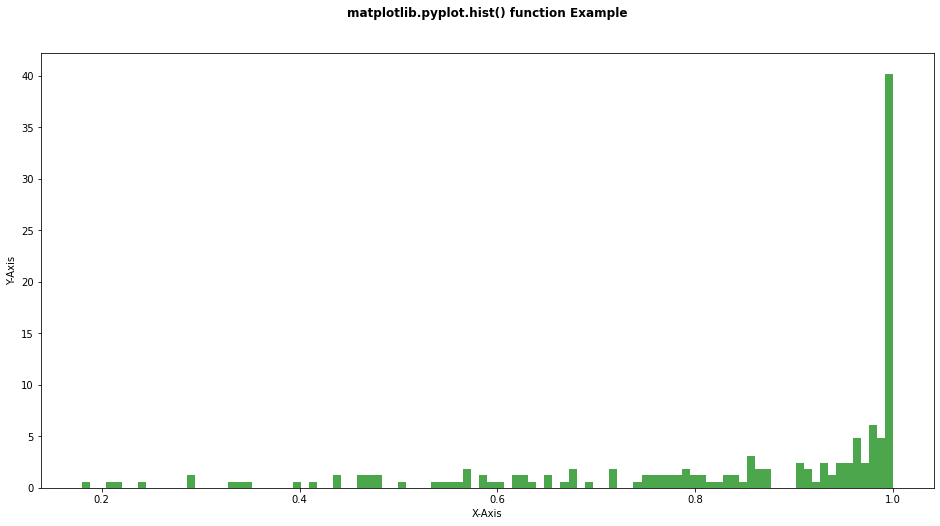

In [155]:

# Implementation of matplotlib function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
   
np.random.seed(10**7)
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000)
   
num_bins = 100

plt.figure(figsize=(16,8))
   
n, bins, patches = plt.hist(norms, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
   
  
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()

In [140]:
test = torch.tensor([1,2,3])
test.shape

torch.Size([3])

In [153]:
torch.add(test, torch.tensor(345345))

tensor([345346, 345347, 345348])

In [158]:
t = [1, 3, 2, 1, 0, 1, 1, 1, 0, 2, 1, 3, 1, 4, 6, 0, 2, 0, 1, 2, 2, 2, 5, 2,
        3, 0, 0, 3, 0, 5, 0, 5, 2, 2, 2, 3, 1, 1, 1, 3, 1, 0, 2, 2, 2, 2, 2, 3,
        2, 2, 1, 2, 2, 4, 3, 1, 1, 0, 2, 3, 1, 1, 0, 3, 3, 5, 4, 1, 3, 2, 1, 5,
        1, 3, 2, 5, 4, 1, 0, 2, 0, 3, 3, 3, 3, 2, 1, 0, 1, 1, 5, 4, 1, 2, 2, 1,
        1, 4, 5]

In [159]:
len(t)

99

In [160]:
a = [53, 35, 26, 97, 51, 15, 82,  1, 37, 15, 47, 65, 47,  9, 34, 48, 47, 78,
        75, 75, 35, 69, 10,  9, 71, 79, 59,  0, 48, 56,  5, 38, 48, 96, 89, 95,
        44, 93,  6,  4, 14, 34,  6, 19, 86, 47, 94, 80, 89, 50, 41, 51, 10, 34,
        98, 89, 42, 51, 54, 82, 18, 84, 29, 45, 75, 28, 54, 97, 49, 16, 60, 94,
         5, 43, 72, 76, 62, 84, 32, 49,  8, 31, 53, 95,  3, 29, 23, 72, 14, 77,
        76, 64, 48, 79, 65,  8, 27, 20, 25,  6, 32, 72, 22, 44, 88, 59, 72, 97,
        75, 61, 44, 96, 80, 91, 89, 42, 21, 47, 21, 82, 61, 14, 70, 81, 37, 96,
         4, 70, 24, 76, 80,  1,  6, 66, 70, 85,  3, 10, 44, 75, 92, 33, 55, 55,
        60, 75, 25, 25, 74, 41, 84, 26, 57, 36, 76, 63,  9, 47, 72, 55, 31, 66,
        59, 21,  8, 65, 83, 79, 17, 12, 28, 86, 49, 61, 37, 68, 75, 17, 20, 74,
        96, 13, 26, 91, 32, 67,  0,  3, 11, 15, 10, 68, 96, 50, 27, 16, 36,  1,
        81, 84]
b= [2, 3, 0, 3, 2, 2, 4, 0, 3, 3, 4, 1, 1, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1,
        1, 3, 3, 2, 2, 2, 0, 2, 3, 1, 3, 2, 2, 3, 1, 0, 0, 2, 2, 1, 4, 1, 0, 6,
        4, 3, 2, 3, 0, 2, 2, 3, 1, 1, 0, 3, 2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1,
        5, 0, 2, 7, 4, 1, 1, 3, 3, 2, 3, 1, 4, 1, 2, 0, 1, 4, 0, 2, 1, 1, 2, 2,
        5, 3, 1]


In [161]:
print(len(a))
print(len(b))

200
99


In [164]:
torch.bincount(torch.tensor(a))

tensor([2, 3, 0, 3, 2, 2, 4, 0, 3, 3, 4, 1, 1, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1,
        1, 3, 3, 2, 2, 2, 0, 2, 3, 1, 3, 2, 2, 3, 1, 0, 0, 2, 2, 1, 4, 1, 0, 6,
        4, 3, 2, 3, 0, 2, 2, 3, 1, 1, 0, 3, 2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1,
        5, 0, 2, 7, 4, 1, 1, 3, 3, 2, 3, 1, 4, 1, 2, 0, 1, 4, 0, 2, 1, 1, 2, 2,
        5, 3, 1])

In [191]:
t = torch.tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 3.], dtype=int)

In [192]:
torch.bincount(t, minlength = 100)

tensor([ 0, 99,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [177]:
len(torch.ones(100))

100

In [178]:
len(t)

100

In [193]:
test = [2, 3, 0, 3, 2, 2, 4, 0, 3, 3, 4, 1, 1, 1, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1,
        1, 3, 3, 2, 2, 2, 0, 2, 3, 1, 3, 2, 2, 3, 1, 0, 0, 2, 2, 1, 4, 1, 0, 6,
        4, 3, 2, 3, 0, 2, 2, 3, 1, 1, 0, 3, 2, 3, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1,
        5, 0, 2, 7, 4, 1, 1, 3, 3, 2, 3, 1, 4, 1, 2, 0, 1, 4, 0, 2, 1, 1, 2, 2,
        5, 3, 1]

In [196]:
np.mean(test)

2.0202020202020203

# Playground for Circle plots

In [215]:
t = torch.tensor([[ 0.2473,  0.3900,  0.6810,  0.1898,  0.0067, -0.4626],
        [ 0.1654,  0.5902, -0.5281,    0.1253,  0.2565,  0.1011],
        [ 0.2007,  0.1418, -0.0372,   0.1977,  0.3022,  0.0441]])

t1 = torch.tensor([[ 0.2473,  0.3900,  0.6810,  0.1898,  0.0067, -0.4626],
        [ 0.1654,  0.5902, -0.5281,    0.1253,  0.2565,  0.1011]])

In [216]:
t.shape

torch.Size([3, 6])

In [217]:
t2 = torch.cat((t,t1))

In [218]:
torch.save(t2, '/Users/dj/Desktop/test/test.pt')

In [219]:
bla = torch.load('/Users/dj/Desktop/test/test.pt')

In [220]:
bla

tensor([[ 0.2473,  0.3900,  0.6810,  0.1898,  0.0067, -0.4626],
        [ 0.1654,  0.5902, -0.5281,  0.1253,  0.2565,  0.1011],
        [ 0.2007,  0.1418, -0.0372,  0.1977,  0.3022,  0.0441],
        [ 0.2473,  0.3900,  0.6810,  0.1898,  0.0067, -0.4626],
        [ 0.1654,  0.5902, -0.5281,  0.1253,  0.2565,  0.1011]])

In [221]:
test= 'models_10d-10c'

In [223]:
test.split('models_')[1]

'10d-10c'